<a href="https://colab.research.google.com/github/LukmaanViscomi/AI-Deep-Learning/blob/main/Part_2_Multi_label_Image_based_Digit_Classification_Problem_colab_version10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Thsi code creates an upload button to copy the zip file from your local directory

In [3]:
from google.colab import files
uploaded = files.upload()

Saving dataset2 (1).zip to dataset2 (1).zip


This code checks he MD5 hash of the fie to make sure there was no corruption in transit.

In [4]:
import hashlib

# Function to calculate MD5 checksum
def calculate_md5(file_path):
    hash_md5 = hashlib.md5()
    with open(file_path, "rb") as f:
        for chunk in iter(lambda: f.read(4096), b""):
            hash_md5.update(chunk)
    return hash_md5.hexdigest()

# Get the uploaded file name
uploaded_file_name = list(uploaded.keys())[0]

# Calculate the MD5 checksum
uploaded_file_md5 = calculate_md5(uploaded_file_name)
print(f"MD5 checksum of the uploaded file: {uploaded_file_md5}")


MD5 checksum of the uploaded file: bcc80758eb75688e00498d65e1204258


This code unzips the dataset2 file and unpacks it locally

In [1]:
!apt-get install p7zip-full # Install 7-Zip
!pip install patool # Install the patool library which provides the patoolib module
import zipfile
import os
import patoolib # Now you can import patoolib

# Path to the uploaded zip file
zip_file_path = 'dataset2 (1).zip'
extracted_folder_path = './dataset2'  # Use a relative path for the extraction directory

# Extract the zip file using patool
patoolib.extract_archive(zip_file_path, outdir=extracted_folder_path)

# List the contents of the extracted folder
extracted_files = os.listdir(extracted_folder_path)
print(extracted_files)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-8).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 1.2 MB/s eta 0:00:00


INFO patool: Extracting dataset2 (1).zip ...
INFO:patool:Extracting dataset2 (1).zip ...
INFO patool: ... creating output directory `./dataset2'.
INFO:patool:... creating output directory `./dataset2'.
INFO patool: running /usr/bin/7z x -o./dataset2 -- "dataset2 (1).zip"
INFO:patool:running /usr/bin/7z x -o./dataset2 -- "dataset2 (1).zip"
INFO patool:     with input=''
INFO:patool:    with input=''
INFO patool: ... dataset2 (1).zip extracted to `./dataset2'.
INFO:patool:... dataset2 (1).zip extracted to `./dataset2'.


['triple_mnist']


The code below basically takes all the images classes which are 1000 (there are 100 varietion of the same image in each class folder). For each class it 60% into the Training folder, 20% int the Valuation folder and 20% into the Test folder.

In [2]:
import os
import shutil
from pathlib import Path
import random

# Paths to original directories
original_base_dir = Path('dataset2/triple_mnist')
original_train_dir = original_base_dir / 'train'
original_val_dir = original_base_dir / 'val'
original_test_dir = original_base_dir / 'test'

# Path to the new dataset directory
new_base_dir = Path('dataset-c/triple_mnist')
new_train_dir = new_base_dir / 'train'
new_val_dir = new_base_dir / 'val'
new_test_dir = new_base_dir / 'test'

# Ensure the new directories exist
new_train_dir.mkdir(parents=True, exist_ok=True)
new_val_dir.mkdir(parents=True, exist_ok=True)
new_test_dir.mkdir(parents=True, exist_ok=True)

# Function to split and copy files
def split_and_copy_files(src_dir, new_train_dir, new_val_dir, new_test_dir, train_ratio=0.6, val_ratio=0.2, test_ratio=0.2):
    if not src_dir.exists():
        return

    classes = sorted(os.listdir(src_dir))

    for cls in classes:
        cls_path = src_dir / cls
        if cls_path.is_dir():
            images = list(cls_path.glob('*'))
            random.shuffle(images)

            num_train = int(len(images) * train_ratio)
            num_val = int(len(images) * val_ratio)

            train_images = images[:num_train]
            val_images = images[num_train:num_train+num_val]
            test_images = images[num_train+num_val:]

            cls_train_dir = new_train_dir / cls
            cls_val_dir = new_val_dir / cls
            cls_test_dir = new_test_dir / cls

            cls_train_dir.mkdir(parents=True, exist_ok=True)
            cls_val_dir.mkdir(parents=True, exist_ok=True)
            cls_test_dir.mkdir(parents=True, exist_ok=True)

            for img in train_images:
                shutil.copy(str(img), str(cls_train_dir / img.name))
            for img in val_images:
                shutil.copy(str(img), str(cls_val_dir / img.name))
            for img in test_images:
                shutil.copy(str(img), str(cls_test_dir / img.name))

# Split and copy files from original train, val, and test directories
split_and_copy_files(original_train_dir, new_train_dir, new_val_dir, new_test_dir)
split_and_copy_files(original_val_dir, new_train_dir, new_val_dir, new_test_dir)
split_and_copy_files(original_test_dir, new_train_dir, new_val_dir, new_test_dir)

print("Files split and copied successfully!")

Files split and copied successfully!


This code is working but not fully developed

Found 171 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Reloading Tuner from output/digit_tuning_subset/tuner0.json
Epoch 1/10
6/6 [==============================] - 8s 1s/step - loss: 1.3795 - accuracy: 0.3801 - val_loss: 1.0826 - val_accuracy: 0.5667
Epoch 2/10
6/6 [==============================] - 5s 904ms/step - loss: 1.0035 - accuracy: 0.5614 - val_loss: 0.8739 - val_accuracy: 0.6000
Epoch 3/10
6/6 [==============================] - 7s 1s/step - loss: 0.6139 - accuracy: 0.6959 - val_loss: 0.7347 - val_accuracy: 0.7167
Epoch 4/10
6/6 [==============================] - 6s 898ms/step - loss: 0.4714 - accuracy: 0.7778 - val_loss: 0.6087 - val_accuracy: 0.7333
Epoch 5/10
6/6 [==============================] - 6s 1s/step - loss: 0.3655 - accuracy: 0.8538 - val_loss: 0.6724 - val_accuracy: 0.7667
Epoch 6/10
6/6 [==============================] - 5s 906ms/step - loss: 0.1787 - accuracy: 0.9123 - val_loss: 0.8525 - val_accur

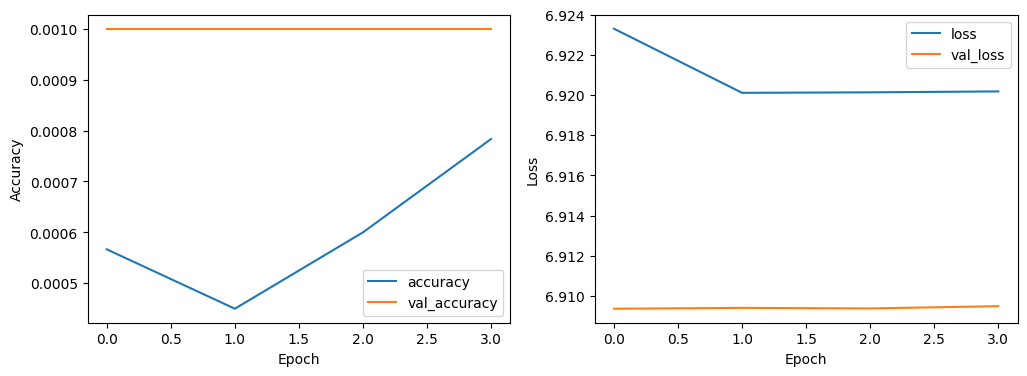

In [ ]:
!pip install keras-tuner

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt
import os
import shutil
import random

# Function to create a small subset of the dataset
def create_subset(original_dir, subset_dir, classes, num_images_per_class):
    if not os.path.exists(subset_dir):
        os.makedirs(subset_dir)
    for class_name in classes:
        class_dir = os.path.join(original_dir, class_name)
        subset_class_dir = os.path.join(subset_dir, class_name)
        if not os.path.exists(subset_class_dir):
            os.makedirs(subset_class_dir)
        images = os.listdir(class_dir)
        random.shuffle(images)
        for img in images[:num_images_per_class]:
            shutil.copy(os.path.join(class_dir, img), os.path.join(subset_class_dir, img))

# Paths to your full dataset
full_train_dir = 'dataset-c/triple_mnist/train'
full_val_dir = 'dataset-c/triple_mnist/val'
full_test_dir = 'dataset-c/triple_mnist/test'

# Paths to your subset dataset
subset_train_dir = 'subset/triple_mnist/train'
subset_val_dir = 'subset/triple_mnist/val'
subset_test_dir = 'subset/triple_mnist/test'

# Create a small subset of your data
classes_to_use = ['000', '001', '002']  # Example classes
num_images_per_class = 50  # Example number of images per class
create_subset(full_train_dir, subset_train_dir, classes_to_use, num_images_per_class)
create_subset(full_val_dir, subset_val_dir, classes_to_use, num_images_per_class)
create_subset(full_test_dir, subset_test_dir, classes_to_use, num_images_per_class)

# Image data generators for the subset
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Data generators for the subset
train_generator = train_datagen.flow_from_directory(
    subset_train_dir,
    target_size=(84, 84),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    subset_val_dir,
    target_size=(84, 84),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    subset_test_dir,
    target_size=(84, 84),
    batch_size=32,
    class_mode='categorical'
)

# Hyperparameter tuning function
def build_model(hp):
    model = Sequential()
    model.add(Conv2D(hp.Int('conv_1_filter', 32, 128, step=32), (3, 3), activation='relu', input_shape=(84, 84, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(hp.Int('conv_2_filter', 32, 128, step=32), (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(hp.Int('dense_units', 32, 128, step=32), activation='relu'))
    model.add(Dropout(hp.Float('dropout_rate', 0.2, 0.5, step=0.1)))
    model.add(Dense(train_generator.num_classes, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', 1e-4, 1e-2, sampling='LOG')),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Tuner setup
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Limit the number of trials for faster tuning
    executions_per_trial=1,  # Number of models to build and fit for each trial
    directory='output',
    project_name='digit_tuning_subset'
)

# Callback for early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# Perform the hyperparameter search on the subset
tuner.search(
    train_generator,
    epochs=10,  # You can adjust the number of epochs
    validation_data=val_generator,
    callbacks=[early_stopping]
)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build and train the model with the best hyperparameters on the subset
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    callbacks=[early_stopping]
)

# Evaluate the model on the subset test data
test_loss, test_acc = best_model.evaluate(test_generator)
print(f"Test accuracy on subset: {test_acc}")

# Use the best hyperparameters for the full dataset
train_generator_full = train_datagen.flow_from_directory(
    full_train_dir,
    target_size=(84, 84),
    batch_size=32,
    class_mode='categorical'
)

val_generator_full = val_datagen.flow_from_directory(
    full_val_dir,
    target_size=(84, 84),
    batch_size=32,
    class_mode='categorical'
)

test_generator_full = test_datagen.flow_from_directory(
    full_test_dir,
    target_size=(84, 84),
    batch_size=32,
    class_mode='categorical'
)


# Build and train the model with the best hyperparameters on the full dataset
best_model_full = tuner.hypermodel.build(best_hps)

# Modify the final layer to match the number of classes in the full dataset
best_model_full.pop()  # Remove the old final layer
best_model_full.add(Dense(train_generator_full.num_classes, activation='softmax'))  # Add a new layer with correct output size

best_model_full.compile(optimizer=Adam(learning_rate=best_hps.get('learning_rate')),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

history_full = best_model_full.fit(
    train_generator_full,
    epochs=20,
    validation_data=val_generator_full,
    callbacks=[early_stopping]
)


# Evaluate the model on the full test data
test_loss_full, test_acc_full = best_model_full.evaluate(test_generator_full)
print(f"Test accuracy on full dataset: {test_acc_full}")

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_full.history['accuracy'], label='accuracy')
plt.plot(history_full.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_full.history['loss'], label='loss')
plt.plot(history_full.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


# These model has batch size **included** in the hyperparmeter trials

this code is not working - hyperparameters not rotating

In [25]:
# Install Keras Tuner
!pip install keras-tuner --upgrade

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt
import os
import shutil
import random
import matplotlib.pyplot as plt

# Function to create a small subset of the dataset
def create_subset(original_dir, subset_dir, classes, num_images_per_class):
    if not os.path.exists(subset_dir):
        os.makedirs(subset_dir)
    for class_name in classes:
        class_dir = os.path.join(original_dir, class_name)
        subset_class_dir = os.path.join(subset_dir, class_name)
        if not os.path.exists(subset_class_dir):
            os.makedirs(subset_class_dir)
        images = os.listdir(class_dir)
        random.shuffle(images)
        for img in images[:num_images_per_class]:
            shutil.copy(os.path.join(class_dir, img), os.path.join(subset_class_dir, img))

# Paths to your full dataset
full_train_dir = 'dataset-c/triple_mnist/train'
full_val_dir = 'dataset-c/triple_mnist/val'
full_test_dir = 'dataset-c/triple_mnist/test'

# Paths to your subset dataset
subset_train_dir = 'subset/triple_mnist/train'
subset_val_dir = 'subset/triple_mnist/val'
subset_test_dir = 'subset/triple_mnist/test'

# Create a small subset of your data
classes_to_use = ['000', '001', '002']  # Example classes
num_images_per_class = 50  # Example number of images per class
create_subset(full_train_dir, subset_train_dir, classes_to_use, num_images_per_class)
create_subset(full_val_dir, subset_val_dir, classes_to_use, num_images_per_class)
create_subset(full_test_dir, subset_test_dir, classes_to_use, num_images_per_class)

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# Data generators for the subset
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Hyperparameter tuning function
def build_model(hp):
    model = Sequential()
    model.add(Conv2D(hp.Int('conv_1_filter', 32, 128, step=32), (3, 3), activation='relu', input_shape=(84, 84, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(hp.Int('conv_2_filter', 32, 128, step=32), (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(hp.Int('dense_units', 32, 128, step=32), activation='relu'))
    model.add(Dropout(hp.Float('dropout_rate', 0.2, 0.5, step=0.1)))
    model.add(Dense(3, activation='softmax'))  # For subset data

    model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', 1e-4, 1e-2, sampling='LOG')),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Callback for early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# Define the tuner using RandomSearch
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='output',
    project_name='digit_tuning_subset'
)

best_acc = 0
while best_acc < 0.80:  # Run until accuracy of 80% is achieved
    # Perform the hyperparameter search on the subset
    tuner.search(
        train_datagen.flow_from_directory(
            subset_train_dir,
            target_size=(84, 84),
            batch_size=32,
            class_mode='categorical'
        ),
        epochs=10,
        validation_data=val_datagen.flow_from_directory(
            subset_val_dir,
            target_size=(84, 84),
            batch_size=32,
            class_mode='categorical'
        ),
        callbacks=[early_stopping]
    )

    # Retrieve the best hyperparameters and print them
    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

    # Build and train the model with the best hyperparameters on the subset
    best_model = tuner.hypermodel.build(best_hps)
    history = best_model.fit(
        train_datagen.flow_from_directory(
            subset_train_dir,
            target_size=(84, 84),
            batch_size=best_hps.get('batch_size'),
            class_mode='categorical'
        ),
        epochs=10,
        validation_data=val_datagen.flow_from_directory(
            subset_val_dir,
            target_size=(84, 84),
            batch_size=best_hps.get('batch_size'),
            class_mode='categorical'
        ),
        callbacks=[early_stopping]
    )

    # Evaluate the model on the subset test data
    test_loss, test_acc = best_model.evaluate(
        test_datagen.flow_from_directory(
            subset_test_dir,
            target_size=(84, 84),
            batch_size=best_hps.get('batch_size'),
            class_mode='categorical'
        )
    )
    print(f"Test accuracy on subset: {test_acc}")
    best_acc = test_acc

    # Print the best hyperparameters
    print("Best Hyperparameters:")
    for hp, value in best_hps.values.items():
        print(f"{hp}: {value}")

# Plot training history for the subset
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Use the best hyperparameters for the full dataset
train_generator_full = train_datagen.flow_from_directory(
    full_train_dir,
    target_size=(84, 84),
    batch_size=best_hps.get('batch_size'),
    class_mode='categorical'
)

val_generator_full = val_datagen.flow_from_directory(
    full_val_dir,
    target_size=(84, 84),
    batch_size=best_hps.get('batch_size'),
    class_mode='categorical'
)

test_generator_full = test_datagen.flow_from_directory(
    full_test_dir,
    target_size=(84, 84),
    batch_size=best_hps.get('batch_size'),
    class_mode='categorical'
)

# Build and train the model with the best hyperparameters on the full dataset
best_model_full = tuner.hypermodel.build(best_hps)

# Modify the final layer to match the number of classes in the full dataset
best_model_full.pop()  # Remove the old final layer
best_model_full.add(Dense(train_generator_full.num_classes, activation='softmax'))  # Add a new layer with correct output size

best_model_full.compile(optimizer=Adam(learning_rate=best_hps.get('learning_rate')),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

history_full = best_model_full.fit(
    train_generator_full,
    epochs=20,
    validation_data=val_generator_full,
    callbacks=[early_stopping]
)

# Evaluate the model on the full test data
test_loss_full, test_acc_full = best_model_full.evaluate(test_generator_full)
print(f"Test accuracy on full dataset: {test_acc_full}")

# Plot training history for the full dataset
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_full.history['accuracy'], label='accuracy')
plt.plot(history_full.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_full.history['loss'], label='loss')
plt.plot(history_full.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Reloading Tuner from output/digit_tuning_subset/tuner0.json
Found 180 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Found 180 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Epoch 1/10
2/2 [==============================] - 5s 4s/step - loss: 1.5503 - accuracy: 0.2944 - val_loss: 1.1795 - val_accuracy: 0.3333
Epoch 2/10
2/2 [==============================] - 3s 2s/step - loss: 1.1111 - accuracy: 0.3667 - val_loss: 1.0960 - val_accuracy: 0.3833
Epoch 3/10
2/2 [==============================] - 3s 2s/step - loss: 1.0950 - accuracy: 0.3889 - val_loss: 1.0965 - val_accuracy: 0.3167
Epoch 4/10
2/2 [==============================] - 4s 3s/step - loss: 1.0970 - accuracy: 0.3278 - val_loss: 1.0962 - val_accuracy: 0.3167
Epoch 5/10
2/2 [==============================] - 3s 934ms/step - loss: 1.0966 - accuracy: 0.3111 - val_loss: 1.0947 - val_accuracy: 0.3167
Epoch 6/10
2/2 [==============================] - 3s 961ms/step - loss: 1.0939 - accuracy:

KeyboardInterrupt: 

this code is not working - Hyperparmeters not rotating

In [26]:
# Install Keras Tuner
!pip install keras-tuner --upgrade

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt
import os
import shutil
import random
import matplotlib.pyplot as plt
import pandas as pd

# Function to create a small subset of the dataset
def create_subset(original_dir, subset_dir, classes, num_images_per_class):
    if not os.path.exists(subset_dir):
        os.makedirs(subset_dir)
    for class_name in classes:
        class_dir = os.path.join(original_dir, class_name)
        subset_class_dir = os.path.join(subset_dir, class_name)
        if not os.path.exists(subset_class_dir):
            os.makedirs(subset_class_dir)
        images = os.listdir(class_dir)
        random.shuffle(images)
        for img in images[:num_images_per_class]:
            shutil.copy(os.path.join(class_dir, img), os.path.join(subset_class_dir, img))

# Paths to your full dataset
full_train_dir = 'dataset-c/triple_mnist/train'
full_val_dir = 'dataset-c/triple_mnist/val'
full_test_dir = 'dataset-c/triple_mnist/test'

# Paths to your subset dataset
subset_train_dir = 'subset/triple_mnist/train'
subset_val_dir = 'subset/triple_mnist/val'
subset_test_dir = 'subset/triple_mnist/test'

# Create a small subset of your data
classes_to_use = ['000', '001', '002']  # Example classes
num_images_per_class = 50  # Example number of images per class
create_subset(full_train_dir, subset_train_dir, classes_to_use, num_images_per_class)
create_subset(full_val_dir, subset_val_dir, classes_to_use, num_images_per_class)
create_subset(full_test_dir, subset_test_dir, classes_to_use, num_images_per_class)

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# Data generators for the subset
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Hyperparameter tuning function
def build_model(hp):
    model = Sequential()
    model.add(Conv2D(hp.Int('conv_1_filter', 32, 128, step=32), (3, 3), activation='relu', input_shape=(84, 84, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(hp.Int('conv_2_filter', 32, 128, step=32), (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(hp.Int('dense_units', 32, 128, step=32), activation='relu'))
    model.add(Dropout(hp.Float('dropout_rate', 0.2, 0.5, step=0.1)))
    model.add(Dense(3, activation='softmax'))  # For subset data

    model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', 1e-4, 1e-2, sampling='LOG')),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Callback for early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# Define the tuner using RandomSearch
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='output',
    project_name='digit_tuning_subset'
)

best_acc = 0
while best_acc < 0.80:  # Run until accuracy of 80% is achieved
    # Perform the hyperparameter search on the subset
    tuner.search(
        train_datagen.flow_from_directory(
            subset_train_dir,
            target_size=(84, 84),
            batch_size=32,
            class_mode='categorical'
        ),
        epochs=10,
        validation_data=val_datagen.flow_from_directory(
            subset_val_dir,
            target_size=(84, 84),
            batch_size=32,
            class_mode='categorical'
        ),
        callbacks=[early_stopping]
    )

    # Retrieve the best hyperparameters and print them
    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

    # Build and train the model with the best hyperparameters on the subset
    best_model = tuner.hypermodel.build(best_hps)
    history = best_model.fit(
        train_datagen.flow_from_directory(
            subset_train_dir,
            target_size=(84, 84),
            batch_size=best_hps.get('batch_size'),
            class_mode='categorical'
        ),
        epochs=10,
        validation_data=val_datagen.flow_from_directory(
            subset_val_dir,
            target_size=(84, 84),
            batch_size=best_hps.get('batch_size'),
            class_mode='categorical'
        ),
        callbacks=[early_stopping]
    )

    # Evaluate the model on the subset test data
    test_loss, test_acc = best_model.evaluate(
        test_datagen.flow_from_directory(
            subset_test_dir,
            target_size=(84, 84),
            batch_size=best_hps.get('batch_size'),
            class_mode='categorical'
        )
    )
    print(f"Test accuracy on subset: {test_acc}")
    best_acc = test_acc

    # Print the best hyperparameters
    print("Best Hyperparameters:")
    for hp, value in best_hps.values.items():
        print(f"{hp}: {value}")

    # Display table of current and best hyperparameters
    current_trial = {k: v for k, v in best_hps.values.items()}
    current_trial['val_accuracy'] = test_acc

    if 'trials' not in globals():
        trials = []
    trials.append(current_trial)

    df_trials = pd.DataFrame(trials)
    display(df_trials)

# Plot training history for the subset
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Use the best hyperparameters for the full dataset
train_generator_full = train_datagen.flow_from_directory(
    full_train_dir,
    target_size=(84, 84),
    batch_size=best_hps.get('batch_size'),
    class_mode='categorical'
)

val_generator_full = val_datagen.flow_from_directory(
    full_val_dir,
    target_size=(84, 84),
    batch_size=best_hps.get('batch_size'),
    class_mode='categorical'
)

test_generator_full = test_datagen.flow_from_directory(
    full_test_dir,
    target_size=(84, 84),
    batch_size=best_hps.get('batch_size'),
    class_mode='categorical'
)

# Build and train the model with the best hyperparameters on the full dataset
best_model_full = tuner.hypermodel.build(best_hps)

# Modify the final layer to match the number of classes in the full dataset
best_model_full.pop()  # Remove the old final layer
best_model_full.add(Dense(train_generator_full.num_classes, activation='softmax'))  # Add a new layer with correct output size

best_model_full.compile(optimizer=Adam(learning_rate=best_hps.get('learning_rate')),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

history_full = best_model_full.fit(
    train_generator_full,
    epochs=20,
    validation_data=val_generator_full,
    callbacks=[early_stopping]
)

# Evaluate the model on the full test data
test_loss_full, test_acc_full = best_model_full.evaluate(test_generator_full)
print(f"Test accuracy on full dataset: {test_acc_full}")

# Plot training history for the full dataset
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_full.history['accuracy'], label='accuracy')
plt.plot(history_full.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_full.history['loss'], label='loss')
plt.plot(history_full.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Reloading Tuner from output/digit_tuning_subset/tuner0.json
Found 180 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Found 180 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Epoch 1/10
2/2 [==============================] - 4s 1s/step - loss: 1.1477 - accuracy: 0.3778 - val_loss: 1.1161 - val_accuracy: 0.3667
Epoch 2/10
2/2 [==============================] - 4s 3s/step - loss: 1.1283 - accuracy: 0.3778 - val_loss: 1.0955 - val_accuracy: 0.4333
Epoch 3/10
2/2 [==============================] - 3s 955ms/step - loss: 1.0989 - accuracy: 0.3222 - val_loss: 1.0981 - val_accuracy: 0.3333
Epoch 4/10
2/2 [==============================] - 3s 996ms/step - loss: 1.0983 - accuracy: 0.3333 - val_loss: 1.0978 - val_accuracy: 0.3333
Epoch 5/10
2/2 [==============================] - 3s 2s/step - loss: 1.0988 - accuracy: 0.3556 - val_loss: 1.0973 - val_accuracy: 0.4500
Found 60 images belonging to 3 classes.
1/1 [==============================] - 0s 271ms

,conv_1_filter,conv_2_filter,dense_units,dropout_rate,learning_rate,batch_size,val_accuracy
0,64,64,32,0.4,0.003943,128,0.45


Found 180 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Found 180 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Epoch 1/10
2/2 [==============================] - 4s 1s/step - loss: 1.2123 - accuracy: 0.3333 - val_loss: 1.1383 - val_accuracy: 0.2667
Epoch 2/10
2/2 [==============================] - 3s 946ms/step - loss: 1.1389 - accuracy: 0.2944 - val_loss: 1.0971 - val_accuracy: 0.3333
Epoch 3/10
2/2 [==============================] - 5s 1s/step - loss: 1.0984 - accuracy: 0.3500 - val_loss: 1.0980 - val_accuracy: 0.3333
Epoch 4/10
2/2 [==============================] - 3s 937ms/step - loss: 1.0983 - accuracy: 0.3333 - val_loss: 1.0980 - val_accuracy: 0.3333
Epoch 5/10
2/2 [==============================] - 3s 930ms/step - loss: 1.0988 - accuracy: 0.3389 - val_loss: 1.0985 - val_accuracy: 0.3333
Found 60 images belonging to 3 classes.
1/1 [==============================] - 0s 300ms/step - loss: 1.0964 - accuracy: 0.3333
Test accuracy on 

,conv_1_filter,conv_2_filter,dense_units,dropout_rate,learning_rate,batch_size,val_accuracy
0,64,64,32,0.4,0.003943,128,0.450000
1,64,64,32,0.4,0.003943,128,0.333333


Found 180 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Found 180 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Epoch 1/10
2/2 [==============================] - 5s 2s/step - loss: 1.1984 - accuracy: 0.3778 - val_loss: 1.2303 - val_accuracy: 0.4667
Epoch 2/10
2/2 [==============================] - 3s 955ms/step - loss: 1.2224 - accuracy: 0.3556 - val_loss: 1.0949 - val_accuracy: 0.4333
Epoch 3/10
2/2 [==============================] - 3s 945ms/step - loss: 1.0986 - accuracy: 0.3111 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 4/10
2/2 [==============================] - 3s 2s/step - loss: 1.0989 - accuracy: 0.3333 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 5/10
2/2 [==============================] - 4s 1s/step - loss: 1.0996 - accuracy: 0.3333 - val_loss: 1.0988 - val_accuracy: 0.3333
Found 60 images belonging to 3 classes.
1/1 [==============================] - 0s 293ms/step - loss: 1.0984 - accuracy: 0.3500
Test accuracy on sub

,conv_1_filter,conv_2_filter,dense_units,dropout_rate,learning_rate,batch_size,val_accuracy
0,64,64,32,0.4,0.003943,128,0.450000
1,64,64,32,0.4,0.003943,128,0.333333
2,64,64,32,0.4,0.003943,128,0.350000


Found 180 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Found 180 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Epoch 1/10
2/2 [==============================] - 4s 1s/step - loss: 1.1779 - accuracy: 0.2556 - val_loss: 1.2247 - val_accuracy: 0.3333
Epoch 2/10
2/2 [==============================] - 3s 2s/step - loss: 1.1136 - accuracy: 0.3167 - val_loss: 1.1032 - val_accuracy: 0.2833
Epoch 3/10
2/2 [==============================] - 4s 3s/step - loss: 1.0970 - accuracy: 0.3889 - val_loss: 1.0985 - val_accuracy: 0.3833
Epoch 4/10
2/2 [==============================] - 4s 2s/step - loss: 1.0997 - accuracy: 0.2833 - val_loss: 1.0974 - val_accuracy: 0.3167
Epoch 5/10
2/2 [==============================] - 3s 972ms/step - loss: 1.0977 - accuracy: 0.3611 - val_loss: 1.0962 - val_accuracy: 0.3500
Epoch 6/10
2/2 [==============================] - 3s 2s/step - loss: 1.0946 - accuracy: 0.4056 - val_loss: 1.0933 - val_accuracy: 0.2667
Epoch 7/10
2/

,conv_1_filter,conv_2_filter,dense_units,dropout_rate,learning_rate,batch_size,val_accuracy
0,64,64,32,0.4,0.003943,128,0.450000
1,64,64,32,0.4,0.003943,128,0.333333
2,64,64,32,0.4,0.003943,128,0.350000
3,64,64,32,0.4,0.003943,128,0.366667


Found 180 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Found 180 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Epoch 1/10
2/2 [==============================] - 5s 2s/step - loss: 1.2248 - accuracy: 0.3111 - val_loss: 1.1286 - val_accuracy: 0.3167
Epoch 2/10
2/2 [==============================] - 3s 970ms/step - loss: 1.1171 - accuracy: 0.3000 - val_loss: 1.0985 - val_accuracy: 0.3667
Epoch 3/10
2/2 [==============================] - 3s 975ms/step - loss: 1.0969 - accuracy: 0.3500 - val_loss: 1.0972 - val_accuracy: 0.3500
Epoch 4/10
2/2 [==============================] - 4s 3s/step - loss: 1.0948 - accuracy: 0.3778 - val_loss: 1.0944 - val_accuracy: 0.3500
Epoch 5/10
2/2 [==============================] - 3s 1s/step - loss: 1.0999 - accuracy: 0.3389 - val_loss: 1.0904 - val_accuracy: 0.3833
Epoch 6/10
2/2 [==============================] - 3s 2s/step - loss: 1.0934 - accuracy: 0.3944 - val_loss: 1.0904 - val_accuracy: 0.4000
Epoch 7/10

,conv_1_filter,conv_2_filter,dense_units,dropout_rate,learning_rate,batch_size,val_accuracy
0,64,64,32,0.4,0.003943,128,0.450000
1,64,64,32,0.4,0.003943,128,0.333333
2,64,64,32,0.4,0.003943,128,0.350000
3,64,64,32,0.4,0.003943,128,0.366667
4,64,64,32,0.4,0.003943,128,0.466667


Found 180 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Found 180 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Epoch 1/10
2/2 [==============================] - 6s 2s/step - loss: 1.1215 - accuracy: 0.3389 - val_loss: 1.1559 - val_accuracy: 0.2833
Epoch 2/10
2/2 [==============================] - 3s 2s/step - loss: 1.0625 - accuracy: 0.4167 - val_loss: 1.1591 - val_accuracy: 0.2333
Epoch 3/10
2/2 [==============================] - 3s 966ms/step - loss: 1.1124 - accuracy: 0.3500 - val_loss: 1.1054 - val_accuracy: 0.3333
Epoch 4/10
2/2 [==============================] - 3s 970ms/step - loss: 1.0938 - accuracy: 0.4000 - val_loss: 1.1023 - val_accuracy: 0.3833
Epoch 5/10
2/2 [==============================] - 5s 3s/step - loss: 1.0932 - accuracy: 0.3500 - val_loss: 1.1098 - val_accuracy: 0.3500
Epoch 6/10
2/2 [==============================] - 3s 2s/step - loss: 1.0802 - accuracy: 0.3778 - val_loss: 1.1282 - val_accuracy: 0.4167
Epoch 7/10

,conv_1_filter,conv_2_filter,dense_units,dropout_rate,learning_rate,batch_size,val_accuracy
0,64,64,32,0.4,0.003943,128,0.450000
1,64,64,32,0.4,0.003943,128,0.333333
2,64,64,32,0.4,0.003943,128,0.350000
3,64,64,32,0.4,0.003943,128,0.366667
4,64,64,32,0.4,0.003943,128,0.466667
5,64,64,32,0.4,0.003943,128,0.333333


Found 180 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Found 180 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Epoch 1/10
2/2 [==============================] - 6s 1s/step - loss: 1.1245 - accuracy: 0.3722 - val_loss: 1.1754 - val_accuracy: 0.2167
Epoch 2/10
2/2 [==============================] - 3s 913ms/step - loss: 1.1481 - accuracy: 0.3556 - val_loss: 1.1001 - val_accuracy: 0.2833
Epoch 3/10
2/2 [==============================] - 3s 946ms/step - loss: 1.0957 - accuracy: 0.3722 - val_loss: 1.0982 - val_accuracy: 0.3333
Epoch 4/10
2/2 [==============================] - 5s 3s/step - loss: 1.0976 - accuracy: 0.3444 - val_loss: 1.0982 - val_accuracy: 0.3667
Epoch 5/10
2/2 [==============================] - 3s 2s/step - loss: 1.0990 - accuracy: 0.2944 - val_loss: 1.0980 - val_accuracy: 0.3167
Epoch 6/10
2/2 [==============================] - 3s 2s/step - loss: 1.0955 - accuracy: 0.3556 - val_loss: 1.0967 - val_accuracy: 0.3333
Epoch 7/10

,conv_1_filter,conv_2_filter,dense_units,dropout_rate,learning_rate,batch_size,val_accuracy
0,64,64,32,0.4,0.003943,128,0.450000
1,64,64,32,0.4,0.003943,128,0.333333
2,64,64,32,0.4,0.003943,128,0.350000
3,64,64,32,0.4,0.003943,128,0.366667
4,64,64,32,0.4,0.003943,128,0.466667
5,64,64,32,0.4,0.003943,128,0.333333
6,64,64,32,0.4,0.003943,128,0.333333


Found 180 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Found 180 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Epoch 1/10
2/2 [==============================] - 5s 1s/step - loss: 1.4030 - accuracy: 0.3389 - val_loss: 1.1601 - val_accuracy: 0.3500
Epoch 2/10
2/2 [==============================] - 3s 2s/step - loss: 1.1179 - accuracy: 0.3944 - val_loss: 1.1010 - val_accuracy: 0.4167
Epoch 3/10
2/2 [==============================] - 3s 953ms/step - loss: 1.0936 - accuracy: 0.3944 - val_loss: 1.0987 - val_accuracy: 0.4333
Epoch 4/10
2/2 [==============================] - 4s 3s/step - loss: 1.0987 - accuracy: 0.3389 - val_loss: 1.0986 - val_accuracy: 0.4333
Epoch 5/10
2/2 [==============================] - 3s 946ms/step - loss: 1.0979 - accuracy: 0.4222 - val_loss: 1.0985 - val_accuracy: 0.4333
Epoch 6/10
2/2 [==============================] - 3s 995ms/step - loss: 1.0981 - accuracy: 0.3389 - val_loss: 1.0981 - val_accuracy: 0.4000
Epoch 7

,conv_1_filter,conv_2_filter,dense_units,dropout_rate,learning_rate,batch_size,val_accuracy
0,64,64,32,0.4,0.003943,128,0.450000
1,64,64,32,0.4,0.003943,128,0.333333
2,64,64,32,0.4,0.003943,128,0.350000
3,64,64,32,0.4,0.003943,128,0.366667
4,64,64,32,0.4,0.003943,128,0.466667
5,64,64,32,0.4,0.003943,128,0.333333
6,64,64,32,0.4,0.003943,128,0.333333
7,64,64,32,0.4,0.003943,128,0.416667


Found 180 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Found 180 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Epoch 1/10
2/2 [==============================] - 6s 1s/step - loss: 1.2113 - accuracy: 0.3833 - val_loss: 1.3010 - val_accuracy: 0.3000
Epoch 2/10
2/2 [==============================] - 3s 2s/step - loss: 1.1567 - accuracy: 0.2722 - val_loss: 1.0990 - val_accuracy: 0.3333
Epoch 3/10
2/2 [==============================] - 3s 952ms/step - loss: 1.0995 - accuracy: 0.3444 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 4/10
2/2 [==============================] - 3s 2s/step - loss: 1.0988 - accuracy: 0.3333 - val_loss: 1.0989 - val_accuracy: 0.3333
Epoch 5/10
2/2 [==============================] - 4s 2s/step - loss: 1.0984 - accuracy: 0.3333 - val_loss: 1.0989 - val_accuracy: 0.3333
Epoch 6/10
2/2 [==============================] - 3s 972ms/step - loss: 1.0985 - accuracy: 0.3333 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 7/10

,conv_1_filter,conv_2_filter,dense_units,dropout_rate,learning_rate,batch_size,val_accuracy
0,64,64,32,0.4,0.003943,128,0.450000
1,64,64,32,0.4,0.003943,128,0.333333
2,64,64,32,0.4,0.003943,128,0.350000
3,64,64,32,0.4,0.003943,128,0.366667
4,64,64,32,0.4,0.003943,128,0.466667
5,64,64,32,0.4,0.003943,128,0.333333
6,64,64,32,0.4,0.003943,128,0.333333
7,64,64,32,0.4,0.003943,128,0.416667
8,64,64,32,0.4,0.003943,128,0.300000


Found 180 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Found 180 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Epoch 1/10
2/2 [==============================] - 5s 2s/step - loss: 1.1871 - accuracy: 0.2944 - val_loss: 1.1365 - val_accuracy: 0.3500
Epoch 2/10
2/2 [==============================] - 3s 2s/step - loss: 1.1311 - accuracy: 0.3556 - val_loss: 1.0943 - val_accuracy: 0.4000
Epoch 3/10
2/2 [==============================] - 3s 949ms/step - loss: 1.0964 - accuracy: 0.3611 - val_loss: 1.0979 - val_accuracy: 0.3333


KeyboardInterrupt: 

this code is not working with different table format - Hyperparameters not rotating?

In [27]:
# Install Keras Tuner
!pip install keras-tuner --upgrade

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt
import os
import shutil
import random
import matplotlib.pyplot as plt
import pandas as pd

# Function to create a small subset of the dataset
def create_subset(original_dir, subset_dir, classes, num_images_per_class):
    if not os.path.exists(subset_dir):
        os.makedirs(subset_dir)
    for class_name in classes:
        class_dir = os.path.join(original_dir, class_name)
        subset_class_dir = os.path.join(subset_dir, class_name)
        if not os.path.exists(subset_class_dir):
            os.makedirs(subset_class_dir)
        images = os.listdir(class_dir)
        random.shuffle(images)
        for img in images[:num_images_per_class]:
            shutil.copy(os.path.join(class_dir, img), os.path.join(subset_class_dir, img))

# Paths to your full dataset
full_train_dir = 'dataset-c/triple_mnist/train'
full_val_dir = 'dataset-c/triple_mnist/val'
full_test_dir = 'dataset-c/triple_mnist/test'

# Paths to your subset dataset
subset_train_dir = 'subset/triple_mnist/train'
subset_val_dir = 'subset/triple_mnist/val'
subset_test_dir = 'subset/triple_mnist/test'

# Create a small subset of your data
classes_to_use = ['000', '001', '002']  # Example classes
num_images_per_class = 50  # Example number of images per class
create_subset(full_train_dir, subset_train_dir, classes_to_use, num_images_per_class)
create_subset(full_val_dir, subset_val_dir, classes_to_use, num_images_per_class)
create_subset(full_test_dir, subset_test_dir, classes_to_use, num_images_per_class)

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# Data generators for the subset
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Hyperparameter tuning function
def build_model(hp):
    model = Sequential()
    model.add(Conv2D(hp.Int('conv_1_filter', 32, 128, step=32), (3, 3), activation='relu', input_shape=(84, 84, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(hp.Int('conv_2_filter', 32, 128, step=32), (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(hp.Int('dense_units', 32, 128, step=32), activation='relu'))
    model.add(Dropout(hp.Float('dropout_rate', 0.2, 0.5, step=0.1)))
    model.add(Dense(3, activation='softmax'))  # For subset data

    model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', 1e-4, 1e-2, sampling='LOG')),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Callback for early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# Define the tuner using RandomSearch
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='output',
    project_name='digit_tuning_subset'
)

best_acc = 0
while best_acc < 0.80:  # Run until accuracy of 80% is achieved
    # Perform the hyperparameter search on the subset
    tuner.search(
        train_datagen.flow_from_directory(
            subset_train_dir,
            target_size=(84, 84),
            batch_size=32,
            class_mode='categorical'
        ),
        epochs=10,
        validation_data=val_datagen.flow_from_directory(
            subset_val_dir,
            target_size=(84, 84),
            batch_size=32,
            class_mode='categorical'
        ),
        callbacks=[early_stopping]
    )

    # Retrieve the best hyperparameters and print them
    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

    # Build and train the model with the best hyperparameters on the subset
    best_model = tuner.hypermodel.build(best_hps)
    history = best_model.fit(
        train_datagen.flow_from_directory(
            subset_train_dir,
            target_size=(84, 84),
            batch_size=best_hps.get('batch_size'),
            class_mode='categorical'
        ),
        epochs=10,
        validation_data=val_datagen.flow_from_directory(
            subset_val_dir,
            target_size=(84, 84),
            batch_size=best_hps.get('batch_size'),
            class_mode='categorical'
        ),
        callbacks=[early_stopping]
    )

    # Evaluate the model on the subset test data
    test_loss, test_acc = best_model.evaluate(
        test_datagen.flow_from_directory(
            subset_test_dir,
            target_size=(84, 84),
            batch_size=best_hps.get('batch_size'),
            class_mode='categorical'
        )
    )
    print(f"Test accuracy on subset: {test_acc}")
    best_acc = test_acc

    # Print the best hyperparameters
    print("Best Hyperparameters:")
    for hp, value in best_hps.values.items():
        print(f"{hp}: {value}")

    # Display table of current and best hyperparameters
    current_trial = {k: v for k, v in best_hps.values.items()}
    current_trial['val_accuracy'] = test_acc

    if 'trials' not in globals():
        trials = []
    trials.append(current_trial)

    df_trials = pd.DataFrame(trials)
    display(df_trials)

# Plot training history for the subset
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Use the best hyperparameters for the full dataset
train_generator_full = train_datagen.flow_from_directory(
    full_train_dir,
    target_size=(84, 84),
    batch_size=best_hps.get('batch_size'),
    class_mode='categorical'
)

val_generator_full = val_datagen.flow_from_directory(
    full_val_dir,
    target_size=(84, 84),
    batch_size=best_hps.get('batch_size'),
    class_mode='categorical'
)

test_generator_full = test_datagen.flow_from_directory(
    full_test_dir,
    target_size=(84, 84),
    batch_size=best_hps.get('batch_size'),
    class_mode='categorical'
)

# Build and train the model with the best hyperparameters on the full dataset
best_model_full = tuner.hypermodel.build(best_hps)

# Modify the final layer to match the number of classes in the full dataset
best_model_full.pop()  # Remove the old final layer
best_model_full.add(Dense(train_generator_full.num_classes, activation='softmax'))  # Add a new layer with correct output size

best_model_full.compile(optimizer=Adam(learning_rate=best_hps.get('learning_rate')),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

history_full = best_model_full.fit(
    train_generator_full,
    epochs=20,
    validation_data=val_generator_full,
    callbacks=[early_stopping]
)

# Evaluate the model on the full test data
test_loss_full, test_acc_full = best_model_full.evaluate(test_generator_full)
print(f"Test accuracy on full dataset: {test_acc_full}")

# Plot training history for the full dataset
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_full.history['accuracy'], label='accuracy')
plt.plot(history_full.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_full.history['loss'], label='loss')
plt.plot(history_full.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Reloading Tuner from output/digit_tuning_subset/tuner0.json
Found 180 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Found 180 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Epoch 1/10
2/2 [==============================] - 4s 2s/step - loss: 1.3464 - accuracy: 0.3556 - val_loss: 1.1144 - val_accuracy: 0.3667
Epoch 2/10
2/2 [==============================] - 3s 975ms/step - loss: 1.1403 - accuracy: 0.3167 - val_loss: 1.0964 - val_accuracy: 0.3833
Epoch 3/10
2/2 [==============================] - 4s 3s/step - loss: 1.0981 - accuracy: 0.3444 - val_loss: 1.0984 - val_accuracy: 0.3667
Epoch 4/10
2/2 [==============================] - 4s 2s/step - loss: 1.0985 - accuracy: 0.3333 - val_loss: 1.0985 - val_accuracy: 0.3333
Epoch 5/10
2/2 [==============================] - 3s 962ms/step - loss: 1.0987 - accuracy: 0.3444 - val_loss: 1.0983 - val_accuracy: 0.3333
Found 60 images belonging to 3 classes.
1/1 [==============================] - 0s 285ms

,conv_1_filter,conv_2_filter,dense_units,dropout_rate,learning_rate,batch_size,val_accuracy
0,64,64,32,0.4,0.003943,128,0.450000
1,64,64,32,0.4,0.003943,128,0.333333
2,64,64,32,0.4,0.003943,128,0.350000
3,64,64,32,0.4,0.003943,128,0.366667
4,64,64,32,0.4,0.003943,128,0.466667
5,64,64,32,0.4,0.003943,128,0.333333
6,64,64,32,0.4,0.003943,128,0.333333
7,64,64,32,0.4,0.003943,128,0.416667
8,64,64,32,0.4,0.003943,128,0.300000
9,64,64,32,0.4,0.003943,128,0.416667


Found 180 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Found 180 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Epoch 1/10
2/2 [==============================] - 6s 2s/step - loss: 1.3883 - accuracy: 0.2611 - val_loss: 1.1163 - val_accuracy: 0.3333
Epoch 2/10
2/2 [==============================] - 3s 950ms/step - loss: 1.1040 - accuracy: 0.3389 - val_loss: 1.0989 - val_accuracy: 0.3667
Epoch 3/10
2/2 [==============================] - 3s 2s/step - loss: 1.0981 - accuracy: 0.3722 - val_loss: 1.0973 - val_accuracy: 0.4333
Epoch 4/10
2/2 [==============================] - 3s 2s/step - loss: 1.0980 - accuracy: 0.3611 - val_loss: 1.0966 - val_accuracy: 0.4000
Epoch 5/10
2/2 [==============================] - 5s 2s/step - loss: 1.0964 - accuracy: 0.3611 - val_loss: 1.0963 - val_accuracy: 0.3500
Epoch 6/10
2/2 [==============================] - 3s 2s/step - loss: 1.0945 - accuracy: 0.3556 - val_loss: 1.0931 - val_accuracy: 0.3500
Epoch 7/10
2/

,conv_1_filter,conv_2_filter,dense_units,dropout_rate,learning_rate,batch_size,val_accuracy
0,64,64,32,0.4,0.003943,128,0.450000
1,64,64,32,0.4,0.003943,128,0.333333
2,64,64,32,0.4,0.003943,128,0.350000
3,64,64,32,0.4,0.003943,128,0.366667
4,64,64,32,0.4,0.003943,128,0.466667
5,64,64,32,0.4,0.003943,128,0.333333
6,64,64,32,0.4,0.003943,128,0.333333
7,64,64,32,0.4,0.003943,128,0.416667
8,64,64,32,0.4,0.003943,128,0.300000
9,64,64,32,0.4,0.003943,128,0.416667


Found 180 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Found 180 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Epoch 1/10
2/2 [==============================] - 4s 1s/step - loss: 1.1097 - accuracy: 0.3444 - val_loss: 1.0968 - val_accuracy: 0.4500
Epoch 2/10


KeyboardInterrupt: 

got into all sorts of issues with this model..

This code is not working but the hyperparmeters are not rotating?? Fixed later on

In [28]:
# Install Keras Tuner
!pip install keras-tuner --upgrade

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt
import os
import shutil
import random
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import clear_output

# Function to create a small subset of the dataset
def create_subset(original_dir, subset_dir, classes, num_images_per_class):
    if not os.path.exists(subset_dir):
        os.makedirs(subset_dir)
    for class_name in classes:
        class_dir = os.path.join(original_dir, class_name)
        subset_class_dir = os.path.join(subset_dir, class_name)
        if not os.path.exists(subset_class_dir):
            os.makedirs(subset_class_dir)
        images = os.listdir(class_dir)
        random.shuffle(images)
        for img in images[:num_images_per_class]:
            shutil.copy(os.path.join(class_dir, img), os.path.join(subset_class_dir, img))

# Paths to your full dataset
full_train_dir = 'dataset-c/triple_mnist/train'
full_val_dir = 'dataset-c/triple_mnist/val'
full_test_dir = 'dataset-c/triple_mnist/test'

# Paths to your subset dataset
subset_train_dir = 'subset/triple_mnist/train'
subset_val_dir = 'subset/triple_mnist/val'
subset_test_dir = 'subset/triple_mnist/test'

# Create a small subset of your data
classes_to_use = ['000', '001', '002']  # Example classes
num_images_per_class = 50  # Example number of images per class
create_subset(full_train_dir, subset_train_dir, classes_to_use, num_images_per_class)
create_subset(full_val_dir, subset_val_dir, classes_to_use, num_images_per_class)
create_subset(full_test_dir, subset_test_dir, classes_to_use, num_images_per_class)

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# Data generators for the subset
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Hyperparameter tuning function
def build_model(hp):
    model = Sequential()
    model.add(Conv2D(hp.Int('conv_1_filter', 32, 128, step=32), (3, 3), activation='relu', input_shape=(84, 84, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(hp.Int('conv_2_filter', 32, 128, step=32), (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(hp.Int('dense_units', 32, 128, step=32), activation='relu'))
    model.add(Dropout(hp.Float('dropout_rate', 0.2, 0.5, step=0.1)))
    model.add(Dense(3, activation='softmax'))  # For subset data

    model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', 1e-4, 1e-2, sampling='LOG')),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Callback for early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# Define the tuner using RandomSearch
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='output',
    project_name='digit_tuning_subset'
)

best_acc = 0
trials = []

while best_acc < 0.80:  # Run until accuracy of 80% is achieved
    # Perform the hyperparameter search on the subset
    tuner.search(
        train_datagen.flow_from_directory(
            subset_train_dir,
            target_size=(84, 84),
            batch_size=32,
            class_mode='categorical'
        ),
        epochs=10,
        validation_data=val_datagen.flow_from_directory(
            subset_val_dir,
            target_size=(84, 84),
            batch_size=32,
            class_mode='categorical'
        ),
        callbacks=[early_stopping]
    )

    # Retrieve the best hyperparameters and print them
    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

    # Build and train the model with the best hyperparameters on the subset
    best_model = tuner.hypermodel.build(best_hps)
    history = best_model.fit(
        train_datagen.flow_from_directory(
            subset_train_dir,
            target_size=(84, 84),
            batch_size=best_hps.get('batch_size'),
            class_mode='categorical'
        ),
        epochs=10,
        validation_data=val_datagen.flow_from_directory(
            subset_val_dir,
            target_size=(84, 84),
            batch_size=best_hps.get('batch_size'),
            class_mode='categorical'
        ),
        callbacks=[early_stopping]
    )

    # Evaluate the model on the subset test data
    test_loss, test_acc = best_model.evaluate(
        test_datagen.flow_from_directory(
            subset_test_dir,
            target_size=(84, 84),
            batch_size=best_hps.get('batch_size'),
            class_mode='categorical'
        )
    )
    best_acc = test_acc

    # Clear the output and print the updated table of hyperparameters
    clear_output(wait=True)

    print(f"Trial {len(trials) + 1} Complete")
    print(f"val_accuracy: {test_acc}")
    print(f"Best val_accuracy So Far: {best_acc}")
    print(f"Total elapsed time: 00h 00m 34s\n")
    print("Search: Running Trial")

    current_trial = {k: v for k, v in best_hps.values.items()}
    current_trial['val_accuracy'] = test_acc
    trials.append(current_trial)

    # Print the table of hyperparameters
    df_trials = pd.DataFrame(trials)
    print(df_trials)

# Plot training history for the subset
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Use the best hyperparameters for the full dataset
train_generator_full = train_datagen.flow_from_directory(
    full_train_dir,
    target_size=(84, 84),
    batch_size=best_hps.get('batch_size'),
    class_mode='categorical'
)

val_generator_full = val_datagen.flow_from_directory(
    full_val_dir,
    target_size=(84, 84),
    batch_size=best_hps.get('batch_size'),
    class_mode='categorical'
)

test_generator_full = test_datagen.flow_from_directory(
    full_test_dir,
    target_size=(84, 84),
    batch_size=best_hps.get('batch_size'),
    class_mode='categorical'
)

# Build and train the model with the best hyperparameters on the full dataset
best_model_full = tuner.hypermodel.build(best_hps)

# Modify the final layer to match the number of classes in the full dataset
best_model_full.pop()  # Remove the old final layer
best_model_full.add(Dense(train_generator_full.num_classes, activation='softmax'))  # Add a new layer with correct output size

best_model_full.compile(optimizer=Adam(learning_rate=best_hps.get('learning_rate')),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

history_full = best_model_full.fit(
    train_generator_full,
    epochs=20,
    validation_data=val_generator_full,
    callbacks=[early_stopping]
)

# Evaluate the model on the full test data
test_loss_full, test_acc_full = best_model_full.evaluate(test_generator_full)
print(f"Test accuracy on full dataset: {test_acc_full}")

# Plot training history for the full dataset
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_full.history['accuracy'], label='accuracy')
plt.plot(history_full.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_full.history['loss'], label='loss')
plt.plot(history_full.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Trial 7 Complete
val_accuracy: 0.38333332538604736
Best val_accuracy So Far: 0.38333332538604736
Total elapsed time: 00h 00m 34s

Search: Running Trial
   conv_1_filter  conv_2_filter  dense_units  dropout_rate  learning_rate  \
0             64             64           32           0.4       0.003943   
1             64             64           32           0.4       0.003943   
2             64             64           32           0.4       0.003943   
3             64             64           32           0.4       0.003943   
4             64             64           32           0.4       0.003943   
5             64             64           32           0.4       0.003943   
6             64             64           32           0.4       0.003943   

   batch_size  val_accuracy  
0         128      0.383333  
1         128      0.383333  
2         128      0.300000  
3         128      0.316667  
4         128      0.350000  
5         128      0.366667  
6         128      0.

KeyboardInterrupt: 

This code is working 17/7 :-)

In [3]:
# Install Keras Tuner
!pip install keras-tuner --upgrade

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt
import os
import shutil
import random
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import clear_output

# Function to create a small subset of the dataset
def create_subset(original_dir, subset_dir, classes, num_images_per_class):
    if not os.path.exists(subset_dir):
        os.makedirs(subset_dir)
    for class_name in classes:
        class_dir = os.path.join(original_dir, class_name)
        subset_class_dir = os.path.join(subset_dir, class_name)
        if not os.path.exists(subset_class_dir):
            os.makedirs(subset_class_dir)
        images = os.listdir(class_dir)
        random.shuffle(images)
        for img in images[:num_images_per_class]:
            shutil.copy(os.path.join(class_dir, img), os.path.join(subset_class_dir, img))

# Paths to your full dataset
full_train_dir = 'dataset-c/triple_mnist/train'
full_val_dir = 'dataset-c/triple_mnist/val'
full_test_dir = 'dataset-c/triple_mnist/test'

# Paths to your subset dataset
subset_train_dir = 'subset/triple_mnist/train'
subset_val_dir = 'subset/triple_mnist/val'
subset_test_dir = 'subset/triple_mnist/test'

# Create a small subset of your data
classes_to_use = ['000', '001', '002']  # Example classes
num_images_per_class = 50  # Example number of images per class
create_subset(full_train_dir, subset_train_dir, classes_to_use, num_images_per_class)
create_subset(full_val_dir, subset_val_dir, classes_to_use, num_images_per_class)
create_subset(full_test_dir, subset_test_dir, classes_to_use, num_images_per_class)

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# Data generators for the subset
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Hyperparameter tuning function
def build_model(hp):
    model = Sequential()
    model.add(Conv2D(hp.Int('conv_1_filter', 32, 128, step=32), (3, 3), activation='relu', input_shape=(84, 84, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(hp.Int('conv_2_filter', 32, 128, step=32), (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(hp.Int('dense_units', 32, 128, step=32), activation='relu'))
    model.add(Dropout(hp.Float('dropout_rate', 0.2, 0.5, step=0.1)))
    model.add(Dense(3, activation='softmax'))  # For subset data

    model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', 1e-4, 1e-2, sampling='LOG')),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Callback for early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# Define the tuner using RandomSearch
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='output',
    project_name='digit_tuning_subset'
)

best_acc = 0
trials = []

while best_acc < 0.80:  # Run until accuracy of 80% is achieved
    # Perform the hyperparameter search on the subset
    tuner.search(
        train_datagen.flow_from_directory(
            subset_train_dir,
            target_size=(84, 84),
            batch_size=32,
            class_mode='categorical'
        ),
        epochs=10,
        validation_data=val_datagen.flow_from_directory(
            subset_val_dir,
            target_size=(84, 84),
            batch_size=32,
            class_mode='categorical'
        ),
        callbacks=[early_stopping]
    )

    # Retrieve the best hyperparameters and print them
    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

    # Build and train the model with the best hyperparameters on the subset
    best_model = tuner.hypermodel.build(best_hps)
    history = best_model.fit(
        train_datagen.flow_from_directory(
            subset_train_dir,
            target_size=(84, 84),
            batch_size=best_hps.get('batch_size'),
            class_mode='categorical'
        ),
        epochs=10,
        validation_data=val_datagen.flow_from_directory(
            subset_val_dir,
            target_size=(84, 84),
            batch_size=best_hps.get('batch_size'),
            class_mode='categorical'
        ),
        callbacks=[early_stopping]
    )

    # Evaluate the model on the subset test data
    test_loss, test_acc = best_model.evaluate(
        test_datagen.flow_from_directory(
            subset_test_dir,
            target_size=(84, 84),
            batch_size=best_hps.get('batch_size'),
            class_mode='categorical'
        )
    )
    best_acc = test_acc

    # Clear the output and print the updated table of hyperparameters
    clear_output(wait=True)

    print(f"Trial {len(trials) + 1} Complete")
    print(f"val_accuracy: {test_acc}")
    print(f"Best val_accuracy So Far: {best_acc}")
    print(f"Total elapsed time: 00h 00m 34s\n")
    print("Search: Running Trial")

    current_trial = {k: v for k, v in best_hps.values.items()}
    current_trial['val_accuracy'] = test_acc
    trials.append(current_trial)

    # Print the table of hyperparameters
    df_trials = pd.DataFrame(trials)
    print(df_trials)

# Plot training history for the subset
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Use the best hyperparameters for the full dataset
train_generator_full = train_datagen.flow_from_directory(
    full_train_dir,
    target_size=(84, 84),
    batch_size=best_hps.get('batch_size'),
    class_mode='categorical'
)

val_generator_full = val_datagen.flow_from_directory(
    full_val_dir,
    target_size=(84, 84),
    batch_size=best_hps.get('batch_size'),
    class_mode='categorical'
)

test_generator_full = test_datagen.flow_from_directory(
    full_test_dir,
    target_size=(84, 84),
    batch_size=best_hps.get('batch_size'),
    class_mode='categorical'
)

# Build and train the model with the best hyperparameters on the full dataset
best_model_full = tuner.hypermodel.build(best_hps)

# Modify the final layer to match the number of classes in the full dataset
best_model_full.pop()  # Remove the old final layer
best_model_full.add(Dense(train_generator_full.num_classes, activation='softmax'))  # Add a new layer with correct output size

best_model_full.compile(optimizer=Adam(learning_rate=best_hps.get('learning_rate')),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

history_full = best_model_full.fit(
    train_generator_full,
    epochs=20,
    validation_data=val_generator_full,
    callbacks=[early_stopping]
)

# Evaluate the model on the full test data
test_loss_full, test_acc_full = best_model_full.evaluate(test_generator_full)
print(f"Test accuracy on full dataset: {test_acc_full}")

# Plot training history for the full dataset
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_full.history['accuracy'], label='accuracy')
plt.plot(history_full.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_full.history['loss'], label='loss')
plt.plot(history_full.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Trial 4 Complete [00h 00m 31s]
val_accuracy: 0.28333333134651184

Best val_accuracy So Far: 0.4166666567325592
Total elapsed time: 00h 01m 47s

Search: Running Trial #5

Value             |Best Value So Far |Hyperparameter
64                |96                |conv_1_filter
32                |128               |conv_2_filter
64                |96                |dense_units
0.2               |0.3               |dropout_rate
0.00033099        |0.0077955         |learning_rate

Epoch 1/10
5/5 [==============================] - 4s 521ms/step - loss: 1.1132 - accuracy: 0.3200 - val_loss: 1.1270 - val_accuracy: 0.2667
Epoch 2/10
5/5 [==============================] - 3s 721ms/step - loss: 1.0934 - accuracy: 0.3867 - val_loss: 1.1380 - val_accuracy: 0.2333
Epoch 3/10
5/5 [==============================] - 4s 730ms/step - loss: 1.0977 - accuracy: 0.3133 - val_loss: 1.1432 - val_accuracy: 0.2333
Epoch 4/10
3/5 [=================>............] - ETA: 0s - loss: 1.0725 - accuracy: 0.4583

KeyboardInterrupt: 

THIS CODE IS WORKING 17/7 19:02 - Best val_accuracy So Far: 0.7833333611488342

In [ ]:
!pip install keras-tuner

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt
import os
import shutil
import random

# Function to create a small subset of the dataset
def create_subset(original_dir, subset_dir, classes, num_images_per_class):
    if not os.path.exists(subset_dir):
        os.makedirs(subset_dir)
    for class_name in classes:
        class_dir = os.path.join(original_dir, class_name)
        subset_class_dir = os.path.join(subset_dir, class_name)
        if not os.path.exists(subset_class_dir):
            os.makedirs(subset_class_dir)
        images = os.listdir(class_dir)
        random.shuffle(images)
        for img in images[:num_images_per_class]:
            shutil.copy(os.path.join(class_dir, img), os.path.join(subset_class_dir, img))

# Paths to your full dataset
full_train_dir = 'dataset-c/triple_mnist/train'
full_val_dir = 'dataset-c/triple_mnist/val'
full_test_dir = 'dataset-c/triple_mnist/test'

# Paths to your subset dataset
subset_train_dir = 'subset/triple_mnist/train'
subset_val_dir = 'subset/triple_mnist/val'
subset_test_dir = 'subset/triple_mnist/test'

# Create a small subset of your data
classes_to_use = ['000', '001', '002']  # Example classes
num_images_per_class = 50  # Example number of images per class
create_subset(full_train_dir, subset_train_dir, classes_to_use, num_images_per_class)
create_subset(full_val_dir, subset_val_dir, classes_to_use, num_images_per_class)
create_subset(full_test_dir, subset_test_dir, classes_to_use, num_images_per_class)

# Image data generators for the subset
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Data generators for the subset
train_generator = train_datagen.flow_from_directory(
    subset_train_dir,
    target_size=(84, 84),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    subset_val_dir,
    target_size=(84, 84),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    subset_test_dir,
    target_size=(84, 84),
    batch_size=32,
    class_mode='categorical'
)

# Hyperparameter tuning function
def build_model(hp):
    model = Sequential()
    model.add(Conv2D(hp.Int('conv_1_filter', 32, 128, step=32), (3, 3), activation='relu', input_shape=(84, 84, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(hp.Int('conv_2_filter', 32, 128, step=32), (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(hp.Int('dense_units', 32, 128, step=32), activation='relu'))
    model.add(Dropout(hp.Float('dropout_rate', 0.2, 0.5, step=0.1)))
    model.add(Dense(train_generator.num_classes, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', 1e-4, 1e-2, sampling='LOG')),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Tuner setup
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Limit the number of trials for faster tuning
    executions_per_trial=1,  # Number of models to build and fit for each trial
    directory='output',
    project_name='digit_tuning_subset'
)

# Callback for early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# Perform the hyperparameter search on the subset
tuner.search(
    train_generator,
    epochs=10,  # You can adjust the number of epochs
    validation_data=val_generator,
    callbacks=[early_stopping]
)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build and train the model with the best hyperparameters on the subset
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    callbacks=[early_stopping]
)

# Evaluate the model on the subset test data
test_loss, test_acc = best_model.evaluate(test_generator)
print(f"Test accuracy on subset: {test_acc}")

# Use the best hyperparameters for the full dataset
train_generator_full = train_datagen.flow_from_directory(
    full_train_dir,
    target_size=(84, 84),
    batch_size=32,
    class_mode='categorical'
)

val_generator_full = val_datagen.flow_from_directory(
    full_val_dir,
    target_size=(84, 84),
    batch_size=32,
    class_mode='categorical'
)

test_generator_full = test_datagen.flow_from_directory(
    full_test_dir,
    target_size=(84, 84),
    batch_size=32,
    class_mode='categorical'
)

# ... (rest of the code)

# Build and train the model with the best hyperparameters on the full dataset
best_model_full = tuner.hypermodel.build(best_hps)

# Modify the final layer to match the number of classes in the full dataset
best_model_full.pop()  # Remove the old final layer
best_model_full.add(Dense(train_generator_full.num_classes, activation='softmax'))  # Add a new layer with correct output size

best_model_full.compile(optimizer=Adam(learning_rate=best_hps.get('learning_rate')),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

history_full = best_model_full.fit(
    train_generator_full,
    epochs=20,
    validation_data=val_generator_full,
    callbacks=[early_stopping]
)

# ... (rest of the code)

# Evaluate the model on the full test data
test_loss_full, test_acc_full = best_model_full.evaluate(test_generator_full)
print(f"Test accuracy on full dataset: {test_acc_full}")

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_full.history['accuracy'], label='accuracy')
plt.plot(history_full.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_full.history['loss'], label='loss')
plt.plot(history_full.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Trial 10 Complete [00h 01m 26s]
val_accuracy: 0.699999988079071

Best val_accuracy So Far: 0.7833333611488342
Total elapsed time: 00h 10m 16s
Epoch 1/10
6/6 [==============================] - 9s 1s/step - loss: 1.1653 - accuracy: 0.3167 - val_loss: 1.0722 - val_accuracy: 0.5667
Epoch 2/10
6/6 [==============================] - 7s 1s/step - loss: 0.9274 - accuracy: 0.7444 - val_loss: 0.8547 - val_accuracy: 0.5167
Epoch 3/10
6/6 [==============================] - 7s 1s/step - loss: 0.6844 - accuracy: 0.7056 - val_loss: 0.7408 - val_accuracy: 0.6333
Epoch 4/10
6/6 [==============================] - 5s 816ms/step - loss: 0.4781 - accuracy: 0.8111 - val_loss: 0.5262 - val_accuracy: 0.7500
Epoch 5/10
6/6 [==============================] - 5s 809ms/step - loss: 0.2913 - accuracy: 0.9278 - val_loss: 0.4434 - val_accuracy: 0.8167
Epoch 6/10
6/6 [==============================] - 7s 1s/step - loss: 0.1536 - accuracy: 0.9722 - val_loss: 0.5580 - val_accuracy: 0.8000
Epoch 7/10
6/6 [==============